In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import mysql.connector

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
user_name = os.environ.get('DB_USER')
password = os.environ.get('DB_PASS')

In [11]:
connection = mysql.connector.connect(host = 'localhost', user ='root' ,
                                     passwd = input(),
                                     db = 'mydatabase'
                                     )

In [12]:
connection

In [13]:
mycursor = connection.cursor()
mycursor.execute("Select * from incomestatement")

In [14]:
myresult = mycursor.fetchall()

for row in myresult:
    print(row)

(1, '2020', 'Microsoft', 134249000, 43, 90, 0, 17, 23, 41, 49, 2, 3, 49, 5, 44, 44, 44, 0.0, 0.0, 0.0, 0.0, 0)
(2, '2019', 'Microsoft', 125, 42, 82, 0, 16, 23, 39, 42, 2, 729, 43, 4, 39, 39, 39, 5.11, 5.0, 7.0, 7.0, 54)
(3, '2018', 'Microsoft', 110, 38, 72, 0, 14, 22, 36, 35, 2, 1, 36, 19, 16, 16, 16, 2.15, 2.0, 7.0, 7.0, 45)
(4, '2017', 'Microsoft', 89, 34, 55, 0, 13, 20, 33, 22, 2, 517, 23, 1, 21, 21, 21, 2.74, 3.0, 7.0, 7.0, 31)
(5, '2016', 'Microsoft', 85, 32, 52, 0, 11, 19, 31, 21, 1, -1, 19, 2, 16, 16, 16, 2.12, 2.0, 7.0, 8.0, 27)
(6, '2016', 'Google', 90, 35, 55, 0, 13, 17, 31, 23, 124, -662, 24, 4, 19, 19, 19, 28.0, 28.0, 687.0, 699.0, 418)


In [15]:
print(type(row))

<class 'tuple'>


In [34]:
data = pd.read_sql("Select * from incomestatement",connection)
data

,ID,Year,Company,Total_Revenue,Cost_of_Revenue,Gross_Profit,Operating_Expenses,Research_Development,Selling_General_and_Administrative,Total_Operating_Expenses,...,Income_Before_Tax,Income_Tax_Expense,Income_From_Continuing_Operations,Net_Income,Net_Income_Available_To_Common_Shareholders,Reported_EPS_Basic,EPS_Diluted,Weighted_Average_Shares_Outstanding_Basic,Diluted,EBITDA
0,1,2020,Microsoft,134249000,43,90,0,17,23,41,...,49,5,44,44,44,0.00,0.0,0.0,0.0,0
1,2,2019,Microsoft,125843000,42,82,0,16,23,39,...,43,4,39,39,39,5.11,5.0,7.0,7.0,54
2,3,2018,Microsoft,110360000,38,72,0,14,22,36,...,36,19,16,16,16,2.15,2.0,7.0,7.0,45
3,4,2017,Microsoft,89950000,34,55,0,13,20,33,...,23,1,21,21,21,2.74,3.0,7.0,7.0,31
4,5,2016,Microsoft,85320000,32,52,0,11,19,31,...,19,2,16,16,16,2.12,2.0,7.0,8.0,27
5,6,2016,Google,90272000,35,55,0,13,17,31,...,24,4,19,19,19,28.00,28.0,687.0,699.0,418


In [25]:
data.dtypes

ID                                               int64
Year                                            object
Company                                         object
Total_Revenue                                    int64
Cost_of_Revenue                                  int64
Gross_Profit                                     int64
Operating_Expenses                               int64
Research_Development                             int64
Selling_General_and_Administrative               int64
Total_Operating_Expenses                         int64
Operating_Income_or_Loss                         int64
Interest_Expense                                 int64
Total_Other_Income_or_Expenses_Net               int64
Income_Before_Tax                                int64
Income_Tax_Expense                               int64
Income_From_Continuing_Operations                int64
Net_Income                                       int64
Net_Income_Available_To_Common_Shareholders      int64
Reported_E

In [26]:
data.shape

(6, 23)

In [35]:
#Understanding the data
data.describe()

,ID,Total_Revenue,Cost_of_Revenue,Gross_Profit,Operating_Expenses,Research_Development,Selling_General_and_Administrative,Total_Operating_Expenses,Operating_Income_or_Loss,Interest_Expense,...,Income_Before_Tax,Income_Tax_Expense,Income_From_Continuing_Operations,Net_Income,Net_Income_Available_To_Common_Shareholders,Reported_EPS_Basic,EPS_Diluted,Weighted_Average_Shares_Outstanding_Basic,Diluted,EBITDA
count,6.000000,6.000000e+00,6.000000,6.000000,6.0,6.00000,6.000000,6.000000,6.00000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,1.059990e+08,37.333333,67.666667,0.0,14.00000,20.666667,35.166667,32.00000,22.166667,...,32.333333,5.833333,25.833333,25.833333,25.833333,6.686667,6.666667,119.166667,121.333333,95.833333
std,1.870829,2.070457e+07,4.457204,16.058227,0.0,2.19089,2.422120,4.215052,11.83216,49.889545,...,12.160044,6.615638,12.384130,12.384130,12.384130,10.568515,10.576704,278.194476,283.012838,158.903010
min,1.000000,8.532000e+07,32.000000,52.000000,0.0,11.00000,17.000000,31.000000,21.00000,1.000000,...,19.000000,1.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250000,9.003050e+07,34.250000,55.000000,0.0,13.00000,19.250000,31.500000,22.25000,2.000000,...,23.250000,2.500000,16.750000,16.750000,16.750000,2.127500,2.000000,7.000000,7.000000,28.000000
50%,3.500000,1.003160e+08,36.500000,63.500000,0.0,13.50000,21.000000,34.500000,29.00000,2.000000,...,30.000000,4.000000,20.000000,20.000000,20.000000,2.445000,2.500000,7.000000,7.000000,38.000000
75%,4.750000,1.219722e+08,41.000000,79.500000,0.0,15.50000,22.750000,38.250000,40.25000,2.000000,...,41.250000,4.750000,34.500000,34.500000,34.500000,4.517500,4.500000,7.000000,7.750000,51.750000
max,6.000000,1.342490e+08,43.000000,90.000000,0.0,17.00000,23.000000,41.000000,49.00000,124.000000,...,49.000000,19.000000,44.000000,44.000000,44.000000,28.000000,28.000000,687.000000,699.000000,418.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 23 columns):
ID                                             6 non-null int64
Year                                           6 non-null object
Company                                        6 non-null object
Total_Revenue                                  6 non-null int64
Cost_of_Revenue                                6 non-null int64
Gross_Profit                                   6 non-null int64
Operating_Expenses                             6 non-null int64
Research_Development                           6 non-null int64
Selling_General_and_Administrative             6 non-null int64
Total_Operating_Expenses                       6 non-null int64
Operating_Income_or_Loss                       6 non-null int64
Interest_Expense                               6 non-null int64
Total_Other_Income_or_Expenses_Net             6 non-null int64
Income_Before_Tax                              6 non-null int64
I

In [29]:
data.isnull().sum()

ID                                             0
Year                                           0
Company                                        0
Total_Revenue                                  0
Cost_of_Revenue                                0
Gross_Profit                                   0
Operating_Expenses                             0
Research_Development                           0
Selling_General_and_Administrative             0
Total_Operating_Expenses                       0
Operating_Income_or_Loss                       0
Interest_Expense                               0
Total_Other_Income_or_Expenses_Net             0
Income_Before_Tax                              0
Income_Tax_Expense                             0
Income_From_Continuing_Operations              0
Net_Income                                     0
Net_Income_Available_To_Common_Shareholders    0
Reported_EPS_Basic                             0
EPS_Diluted                                    0
Weighted_Average_Sha

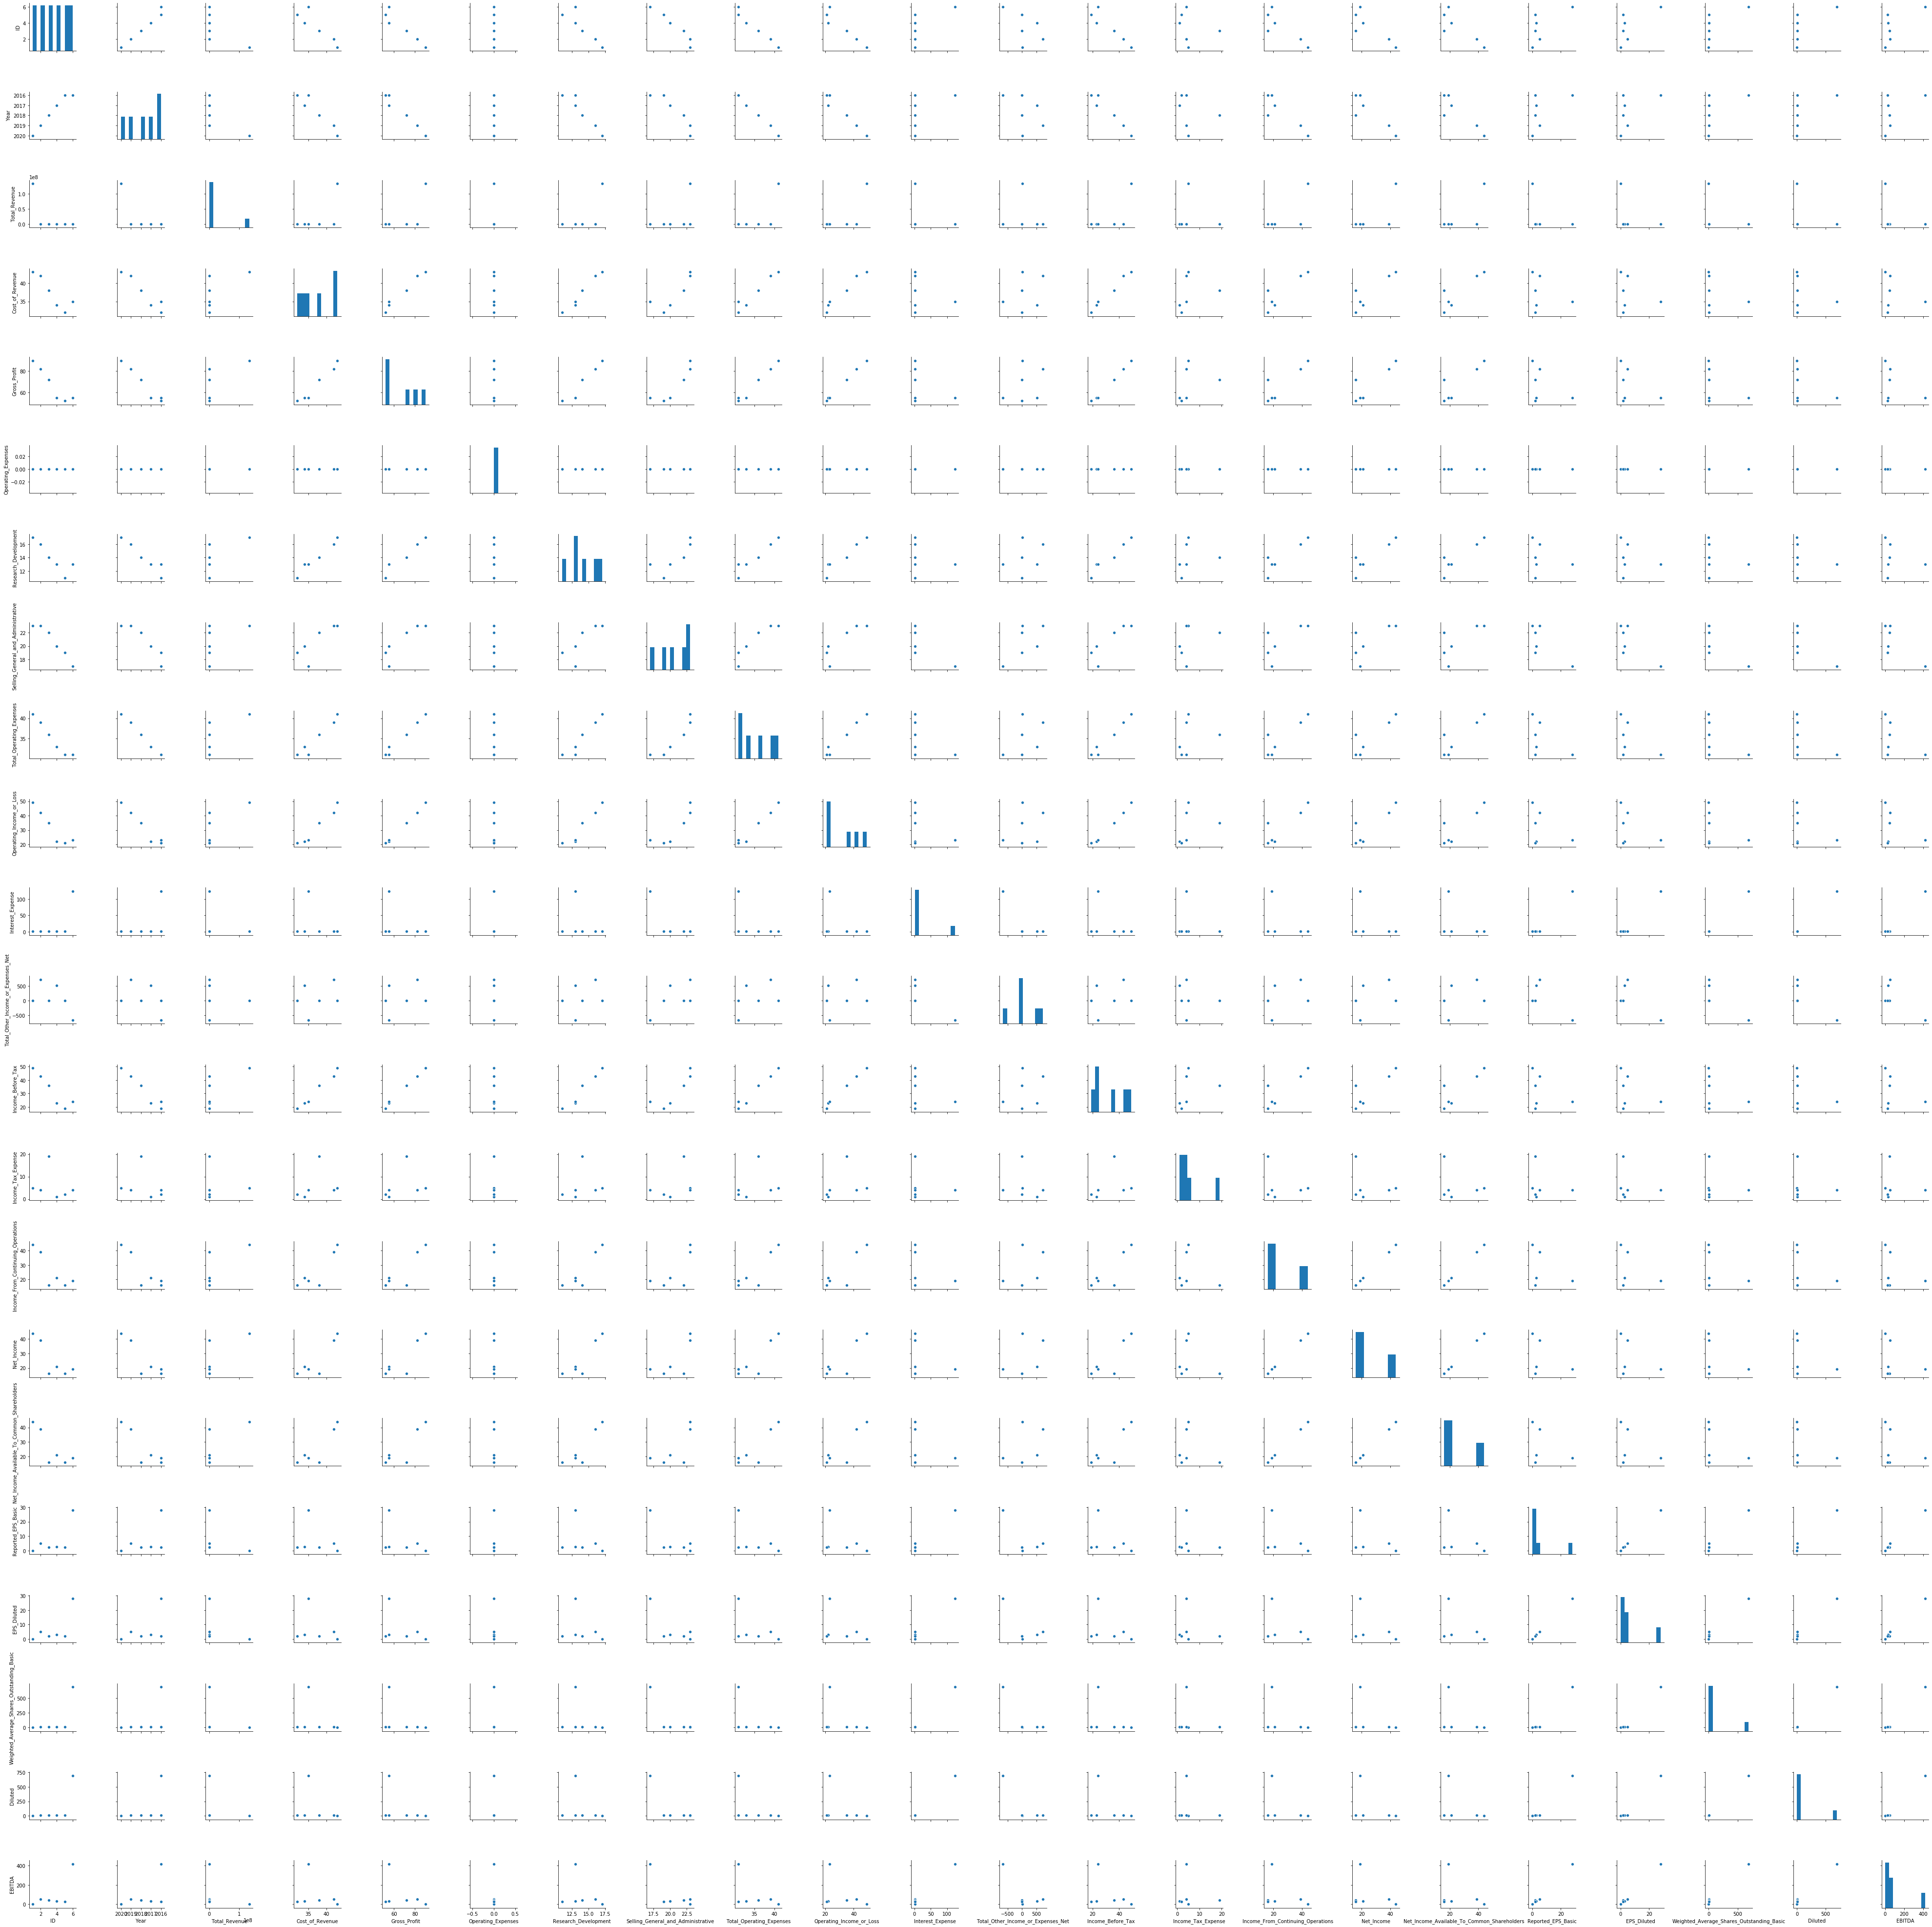

In [30]:
#Data visualization
sns.pairplot(data)

In [36]:
corrmat = data.corr()
corrmat

,ID,Total_Revenue,Cost_of_Revenue,Gross_Profit,Operating_Expenses,Research_Development,Selling_General_and_Administrative,Total_Operating_Expenses,Operating_Income_or_Loss,Interest_Expense,...,Income_Before_Tax,Income_Tax_Expense,Income_From_Continuing_Operations,Net_Income,Net_Income_Available_To_Common_Shareholders,Reported_EPS_Basic,EPS_Diluted,Weighted_Average_Shares_Outstanding_Basic,Diluted,EBITDA
ID,1.000000,-0.934212,-0.887432,-0.938680,NaN,-0.878310,-0.971008,-0.976458,-0.930613,0.650347,...,-0.923103,-0.234311,-0.815760,-0.815760,-0.815760,0.665693,0.667098,0.660000,0.660662,0.671084
Total_Revenue,-0.934212,1.000000,0.988415,0.998989,NaN,0.962276,0.880832,0.987636,0.997042,-0.367497,...,0.996997,0.267452,0.873597,0.873597,0.873597,-0.381498,-0.385339,-0.378205,-0.378913,-0.386741
Cost_of_Revenue,-0.887432,0.988415,1.000000,0.982655,NaN,0.983078,0.827476,0.965189,0.978415,-0.251235,...,0.990164,0.246434,0.878042,0.878042,0.878042,-0.256839,-0.260204,-0.262318,-0.263137,-0.265626
Gross_Profit,-0.938680,0.998989,0.982655,1.000000,NaN,0.955039,0.886147,0.987891,0.998929,-0.381874,...,0.997258,0.294942,0.858530,0.858530,0.858530,-0.400711,-0.404687,-0.392615,-0.393309,-0.402973
Operating_Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Research_Development,-0.878310,0.962276,0.983078,0.955039,NaN,1.000000,0.791467,0.952926,0.948966,-0.217744,...,0.968420,0.165584,0.899298,0.899298,0.899298,-0.232180,-0.233036,-0.230027,-0.230949,-0.242432
Selling_General_and_Administrative,-0.971008,0.880832,0.827476,0.886147,NaN,0.791467,1.000000,0.927253,0.872329,-0.737624,...,0.866915,0.345318,0.697874,0.697874,0.697874,-0.728462,-0.731255,-0.744907,-0.745548,-0.733904
Total_Operating_Expenses,-0.976458,0.987636,0.965189,0.987891,NaN,0.952926,0.927253,1.000000,0.982492,-0.479503,...,0.982014,0.237880,0.874206,0.874206,0.874206,-0.494117,-0.496471,-0.490219,-0.490955,-0.500708
Operating_Income_or_Loss,-0.930613,0.997042,0.978415,0.998929,NaN,0.948966,0.872329,0.982492,1.000000,-0.368287,...,0.995277,0.291272,0.858521,0.858521,0.858521,-0.392120,-0.396339,-0.379081,-0.379735,-0.392944
Interest_Expense,0.650347,-0.367497,-0.251235,-0.381874,NaN,-0.217744,-0.737624,-0.479503,-0.368287,1.000000,...,-0.330773,-0.133212,-0.266682,-0.266682,-0.266682,0.988052,0.988250,0.999897,0.999883,0.993319


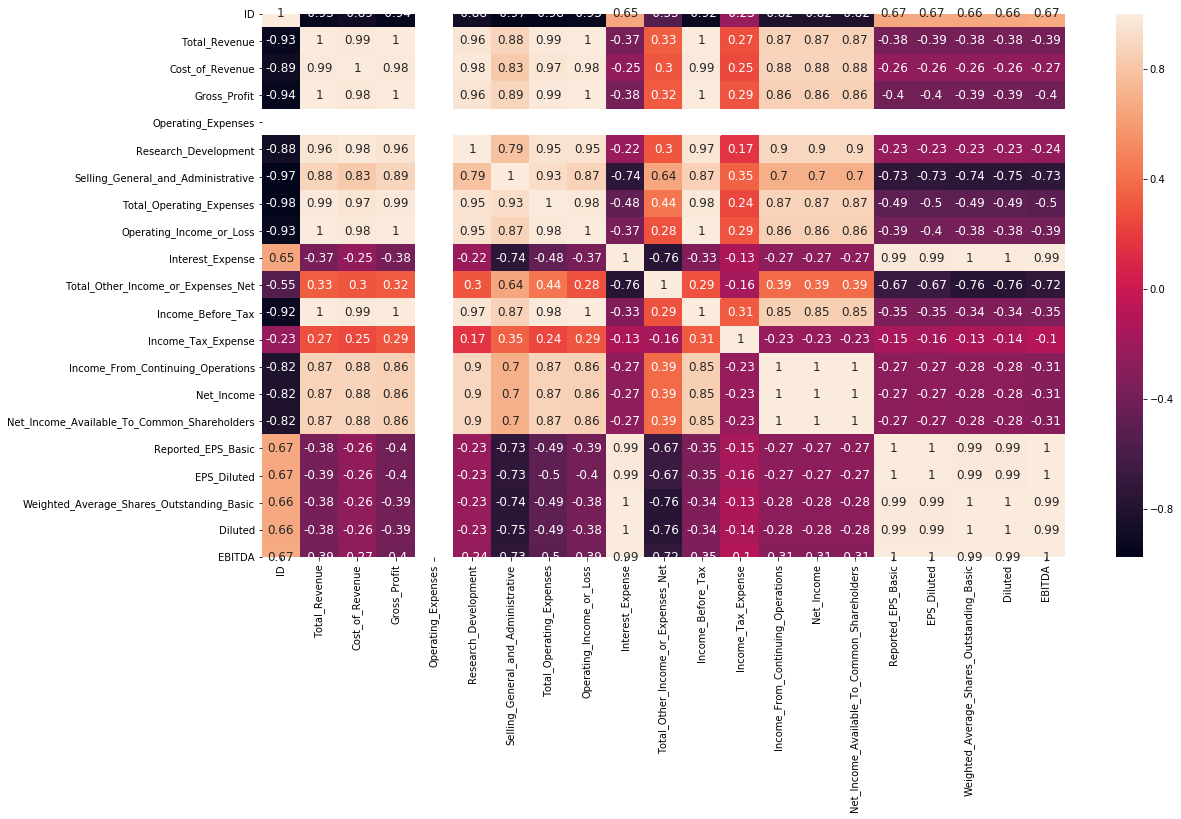

In [37]:
fig,ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot = True , annot_kws={'size': 12})

In [38]:
def getCorrelatedFeature(corrdata,threshold):
    feature = []
    value = []
    
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
    
    df = pd.DataFrame(data = value,index = feature,columns=['Corr Value'])
    return df

In [40]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Total_Revenue'],threshold)
corr_value

,Corr Value
ID,-0.934212
Total_Revenue,1.000000
Cost_of_Revenue,0.988415
Gross_Profit,0.998989
Research_Development,0.962276
Selling_General_and_Administrative,0.880832
Total_Operating_Expenses,0.987636
Operating_Income_or_Loss,0.997042
Income_Before_Tax,0.996997
Income_From_Continuing_Operations,0.873597


In [41]:
corr_value.index.values

array(['ID', 'Total_Revenue', 'Cost_of_Revenue', 'Gross_Profit',
       'Research_Development', 'Selling_General_and_Administrative',
       'Total_Operating_Expenses', 'Operating_Income_or_Loss',
       'Income_Before_Tax', 'Income_From_Continuing_Operations',
       'Net_Income', 'Net_Income_Available_To_Common_Shareholders'],
      dtype=object)

In [42]:
correlated_data = data[corr_value.index]
correlated_data.head()

,ID,Total_Revenue,Cost_of_Revenue,Gross_Profit,Research_Development,Selling_General_and_Administrative,Total_Operating_Expenses,Operating_Income_or_Loss,Income_Before_Tax,Income_From_Continuing_Operations,Net_Income,Net_Income_Available_To_Common_Shareholders
0,1,134249000,43,90,17,23,41,49,49,44,44,44
1,2,125843000,42,82,16,23,39,42,43,39,39,39
2,3,110360000,38,72,14,22,36,35,36,16,16,16
3,4,89950000,34,55,13,20,33,22,23,21,21,21
4,5,85320000,32,52,11,19,31,21,19,16,16,16


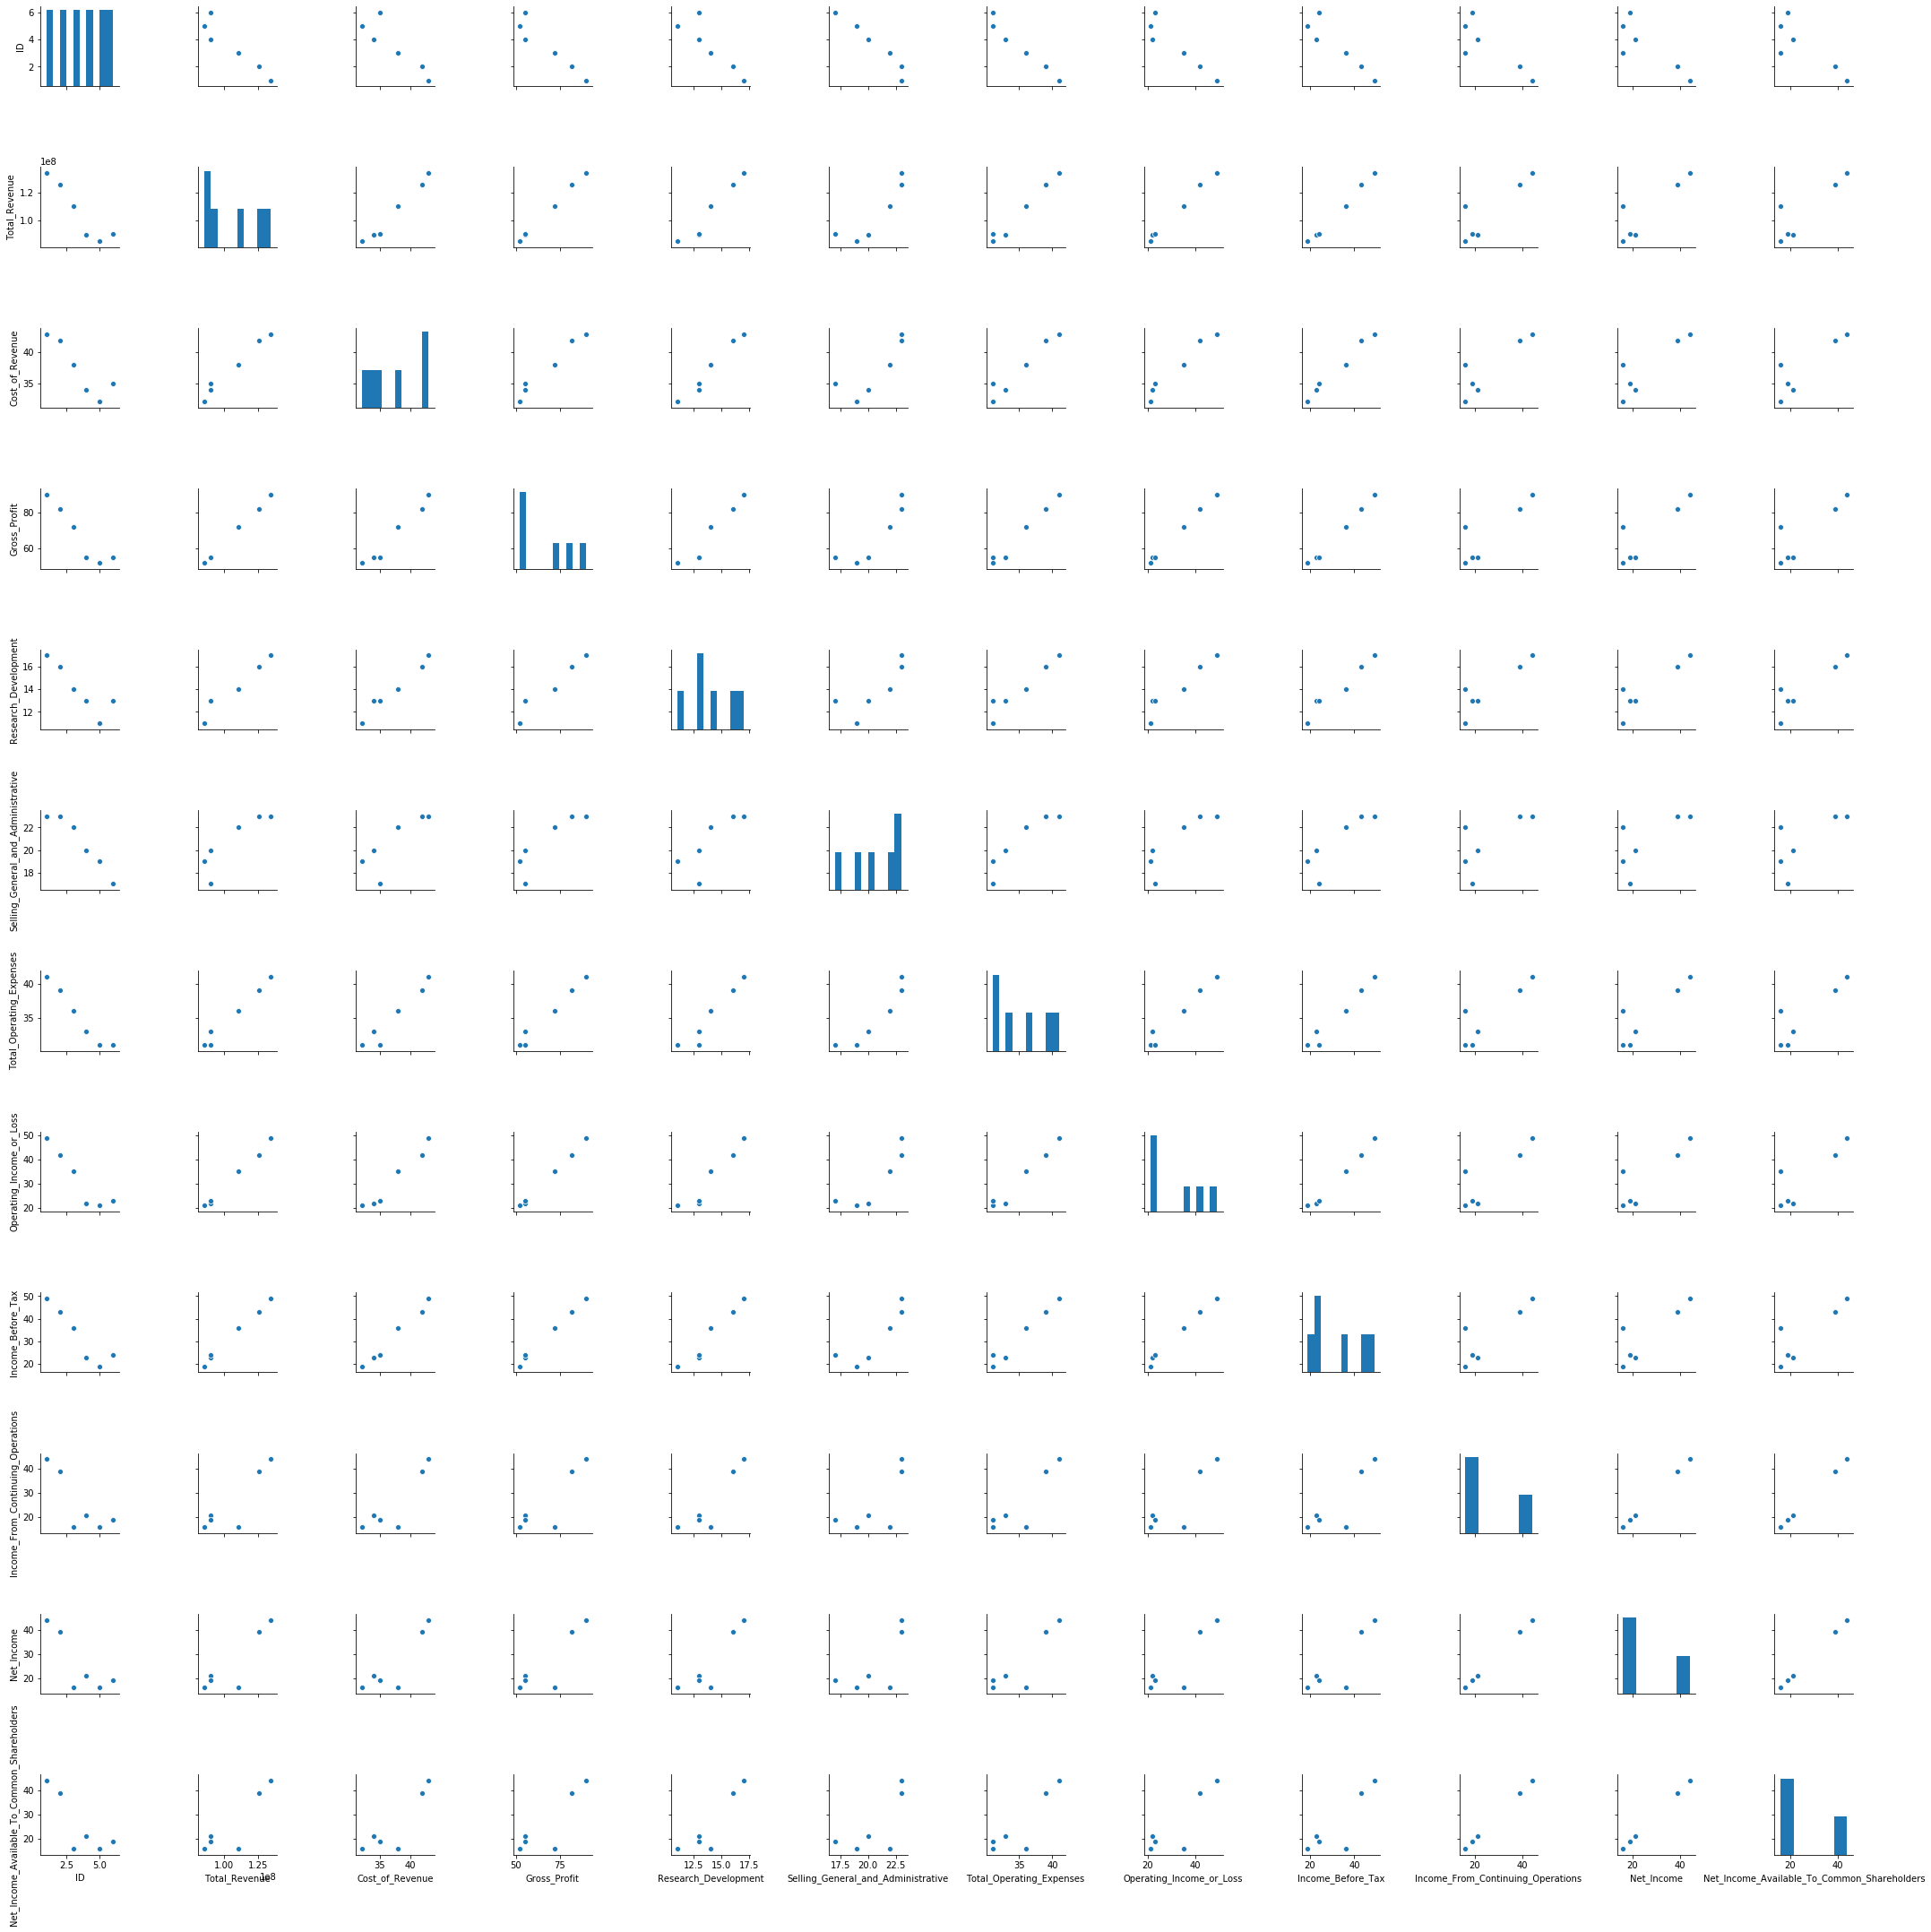

In [43]:
#Pairplot and corrmat of correlated data
sns.pairplot(correlated_data)
plt.tight_layout()

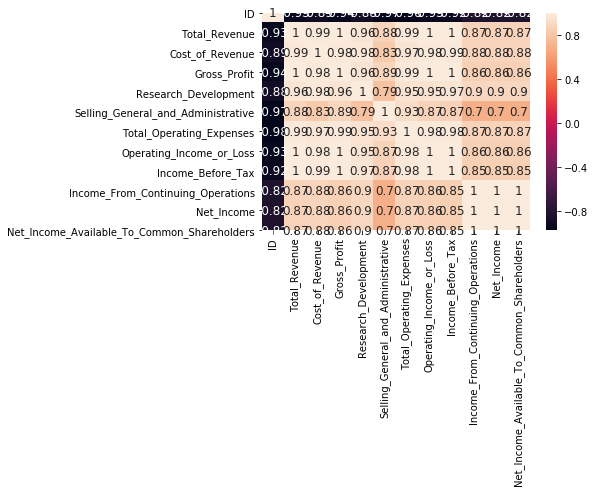

In [44]:
sns.heatmap(correlated_data.corr(),annot=True, annot_kws={'size':12})

In [45]:
#Shuffle and split data
X = correlated_data.drop(labels=['Total_Revenue'],axis = 1)
y = correlated_data['Total_Revenue']
X.head()

,ID,Cost_of_Revenue,Gross_Profit,Research_Development,Selling_General_and_Administrative,Total_Operating_Expenses,Operating_Income_or_Loss,Income_Before_Tax,Income_From_Continuing_Operations,Net_Income,Net_Income_Available_To_Common_Shareholders
0,1,43,90,17,23,41,49,49,44,44,44
1,2,42,82,16,23,39,42,43,39,39,39
2,3,38,72,14,22,36,35,36,16,16,16
3,4,34,55,13,20,33,22,23,21,21,21
4,5,32,52,11,19,31,21,19,16,16,16


In [46]:
X_train,X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [47]:
X_train.shape,X_test.shape

((4, 11), (2, 11))

In [48]:
#training the mode
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_predict = model.predict(X_test)

In [50]:
y_predict,y_test

(array([9.05827355e+07, 1.09713002e+08]),
 5     90272000
 2    110360000
 Name: Total_Revenue, dtype: int64)

In [51]:
df = pd.DataFrame(data = [y_predict,y_test])
df.T

,0,1
0,9.058274e+07,90272000.0
1,1.097130e+08,110360000.0


In [52]:
from sklearn.metrics import r2_score
correlated_data.columns

Index(['ID', 'Total_Revenue', 'Cost_of_Revenue', 'Gross_Profit',
       'Research_Development', 'Selling_General_and_Administrative',
       'Total_Operating_Expenses', 'Operating_Income_or_Loss',
       'Income_Before_Tax', 'Income_From_Continuing_Operations', 'Net_Income',
       'Net_Income_Available_To_Common_Shareholders'],
      dtype='object')

In [53]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

mse = mean_squared_error(y_test,y_predict)
print('r2 score:' , score)
print('mae:' , mae)
print('mse' , mse)


r2 score: 0.9974467054022756
mae: 478866.6038842723
mse 257581302196.7723


In [ ]:
data = pd.DataFrame(newIS)
data.head()

In [ ]:
with open('incomestatement.json') as f:
    data = json.load(f)
print(data)

In [ ]:
for IS in data['data']:
    print(type(IS))

In [ ]:
print(type(newIS["Total_Revenue"]))